In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train shape", train.shape)
print("test shape", test.shape)

train shape (1460, 81)
test shape (1459, 80)


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

       price  log(price + 1)
0     208500       12.247699
1     181500       12.109016
2     223500       12.317171
3     140000       11.849405
4     250000       12.429220
...      ...             ...
1455  175000       12.072547
1456  210000       12.254868
1457  266500       12.493133
1458  142125       11.864469
1459  147500       11.901590

[1460 rows x 2 columns] 

price skew: 1.880940746034036
log(price + 1) skew: 0.12122191311528363


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

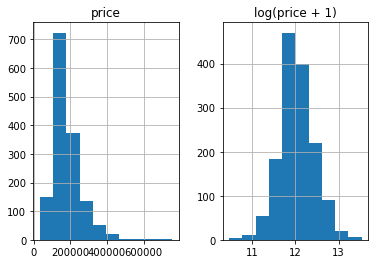

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

prices = pd.DataFrame({'price':train['SalePrice'], 'log(price + 1)':np.log1p(train['SalePrice'])})
print(prices, '\n')
print('price skew:', skew(prices['price']))
print('log(price + 1) skew:', skew(prices['log(price + 1)']))
prices.hist()

In [4]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [5]:
all_data = pd.concat((train.loc[:, 'MSSubClass':'SaleCondition'], test.loc[:, 'MSSubClass':'SaleCondition']))

print(all_data.shape)
print(all_data)

(2919, 79)
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    In

In [6]:
from scipy.stats import skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print("-----Column if non-object type-----")
print(numeric_feats)

skewed_feats = train[numeric_feats].apply(lambda x:skew(x.dropna()))
print('-----Skewness of non-object type column-----')
print(skewed_feats)

skewed_feats = skewed_feats[skewed_feats > 0.75]
print(skewed_feats)

skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data[skewed_feats]

-----Column if non-object type-----
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
-----Skewness of non-object type column-----
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF        

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,...,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,...,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,...,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,...,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,...,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1455,5.081404,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
1456,3.044522,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,...,7.110696,0.000000,0.693147,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000
1457,4.454347,4.143135,9.253591,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,...,6.878326,0.693147,0.693147,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508


In [7]:
cc_data = pd.get_dummies(train['LotShape'])
cc_data['LotShape'] = train['LotShape']
cc_data[:20]

,IR1,IR2,IR3,Reg,LotShape
0,0,0,0,1,Reg
1,0,0,0,1,Reg
2,1,0,0,0,IR1
3,1,0,0,0,IR1
4,1,0,0,0,IR1
5,1,0,0,0,IR1
6,0,0,0,1,Reg
7,1,0,0,0,IR1
8,0,0,0,1,Reg
9,0,0,0,1,Reg


In [8]:
all_data = pd.get_dummies(all_data)

In [9]:
all_data = all_data.fillna(all_data[:train.shape[0]].mean())

In [25]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train['SalePrice']

In [12]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y)

params = {"max_depth":3, "eta":0.1}

cross_val = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=50)

cross_val

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.380516,0.003151,10.380511,0.007226
1,9.345149,0.002914,9.345143,0.007585
2,8.413392,0.002710,8.413386,0.007926
3,7.574889,0.002511,7.575220,0.007951
4,6.820173,0.002320,6.820488,0.007688
...,...,...,...,...
405,0.040728,0.000315,0.125469,0.013440
406,0.040664,0.000320,0.125464,0.013418
407,0.040607,0.000326,0.125434,0.013416
408,0.040534,0.000332,0.125432,0.013409


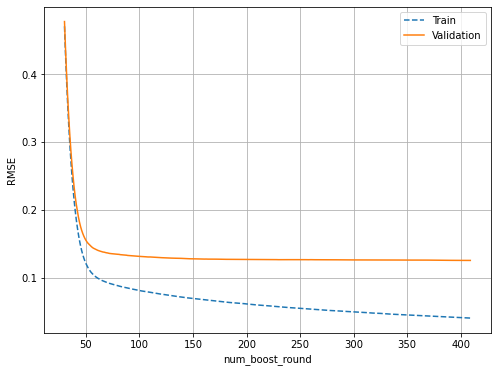

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val.loc[30:, ["train-rmse-mean"]], linestyle='--', label='Train')
plt.plot(cross_val.loc[30:, ["test-rmse-mean"]], label='Validation')
plt.grid()
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    '''
    Parameters:
        model(obj): Model object
    Return:
        (float)
    '''
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

In [19]:
model_xgb = xgb.XGBRegressor(n_estimators=410, max_depth=3, learning_rate=0.1)
model_xgb.fit(X_train, y)
print("xgboost RMSE loss:")
print(rmse_cv(model_xgb).mean())

xgboost RMSE loss:
0.12437590040488111


In [20]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.0005]).fit(X_train, y)

print('Lasso regression RMSE loss')
print(rmse_cv(model_lasso))

print("Average Loss:", rmse_cv(model_lasso).mean())
print("Minimum Loss:", rmse_cv(model_lasso).min())
print('Best Alpha:', model_lasso.alpha_)

Lasso regression RMSE loss
[0.10330995 0.13147299 0.12552458 0.10530461 0.14723333]
Average Loss: 0.12256909294466996
Minimum Loss: 0.10330995071896429
Best Alpha: 0.0005


In [24]:
lasso_preds = np.expm1(model_lasso.predict(X_test))
xgb_preds = np.expm1(model_xgb.predict(X_test))

preds = lasso_preds * 0.7 + xgb_preds * 0.3
print(preds.shape)

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ensemble_sol.csv", index=False)

(1460,)


ValueError: array length 1460 does not match index length 1459